# Shipping Containers

* **Data:** `Stats - TEU By Year.csv`
* **Description:** Shipping container statistics, by year, from the Port of Long Beach (California).
* **Source:** https://polb.com/business/port-statistics/#yearly-teus
* **Columns of interest:**
    * `Year` is the year of the data
    * **Loaded** columns involve shipping containers that are full
    * **Empty** columns involve shipping containers are are empty
    * **Inbound** columns involve shipping containers coming into the port
    * **Outbound** columns involve shipping containers leaving the port
    * `Total Throughput` is the number of shipping containers going in and out of the port

## Read in your data

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)
df = pd.read_csv('Stats - TEU By Year.csv')
df.head()

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput
0,2020,"3,998,340","1,475,888","5,474,227","146,370","2,492,718","2,639,088","8,113,315"
1,2019,"3,758,438","1,472,802","5,231,240","74,706","2,326,087","2,400,792","7,632,032"
2,2018,"4,097,377","1,523,008","5,620,386","91,364","2,379,274","2,470,638","8,091,023"
3,2017,"3,863,187","1,470,514","5,333,701","75,710","2,135,096","2,210,806","7,544,507"
4,2016,"3,442,575","1,529,497","4,972,073","99,349","1,703,750","1,803,098","6,775,171"


## How many years of data do we have?

Also provide the first and last year

In [2]:
# df.info()
len(df)


25

## What is the total number of shipping containers that went in and out of the port during this time period?

In [3]:
df['Total Throughput'] = df['Total Throughput'].str.replace(',', '').astype(int)
df['Loaded Inbound'] = df['Loaded Inbound'].str.replace(',', '').astype(int)
df['Loaded Outbound'] = df['Loaded Outbound'].str.replace(',', '').astype(int)
df['Total Loaded'] = df['Total Loaded'].str.replace(',', '').astype(int)
df['Empties Inbound'] = df['Empties Inbound'].str.replace(',', '').astype(int)
df['Empties Outbound'] = df['Empties Outbound'].str.replace(',', '').astype(int)
df['Total Empties'] = df['Total Empties'].str.replace(',', '').astype(int)

In [4]:
df['Total Throughput'] = df['Total Throughput'].astype(int)
df['Total Throughput'].sum()

149025835

## Create a new column called `total_inbound` that is the number of containers entering the port

In [5]:

df['total_inbound'] = df['Empties Inbound'] + df['Loaded Inbound']

In [6]:
df.head()

,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput,total_inbound
0,2020,3998340,1475888,5474227,146370,2492718,2639088,8113315,4144710
1,2019,3758438,1472802,5231240,74706,2326087,2400792,7632032,3833144
2,2018,4097377,1523008,5620386,91364,2379274,2470638,8091023,4188741
3,2017,3863187,1470514,5333701,75710,2135096,2210806,7544507,3938897
4,2016,3442575,1529497,4972073,99349,1703750,1803098,6775171,3541924


## Create a new column that is percent empty for containers entering the port

In [7]:
df['empties_inbound_pc'] = df['Empties Inbound'] / df['Total Throughput'] * 100

df.head()

,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput,total_inbound,empties_inbound_pc
0,2020,3998340,1475888,5474227,146370,2492718,2639088,8113315,4144710,1.804071455379213
1,2019,3758438,1472802,5231240,74706,2326087,2400792,7632032,3833144,0.9788480970729683
2,2018,4097377,1523008,5620386,91364,2379274,2470638,8091023,4188741,1.1292020798853248
3,2017,3863187,1470514,5333701,75710,2135096,2210806,7544507,3938897,1.0035115614578924
4,2016,3442575,1529497,4972073,99349,1703750,1803098,6775171,3541924,1.4663688931246164


## What year had the highest percentage of empty containers coming into port?

In [8]:
df.sort_values(by='empties_inbound_pc', ascending=False).head()


# df.groupby('empties_inbound_pc').Year.value_counts()


,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput,total_inbound,empties_inbound_pc
24,1996,1547578,1081722,2629299,179252,258618,437869,3067169,1726830,5.8442166049539495
23,1997,1806734,1107492,2914225,93884,496616,590500,3504725,1900618,2.6787836420831876
22,1998,2096902,973598,3070500,108197,918943,1027139,4097639,2205099,2.640471744826716
17,2003,2370364,897145,3267509,107715,1206221,1313936,4581445,2478079,2.3511141135602416
16,2004,2987973,1007913,3995886,124006,1659955,1783960,5779846,3111979,2.145489689517679


## Plot the percent of empty containers coming into port over the years

<AxesSubplot:ylabel='Year'>

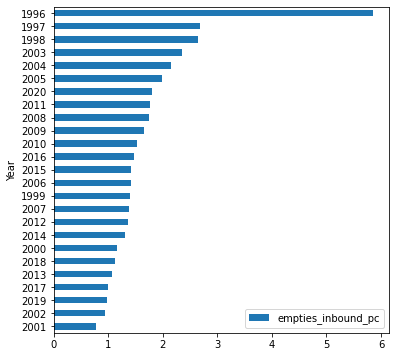

In [9]:
df.sort_values(by='empties_inbound_pc').plot(kind='barh', x='Year', y='empties_inbound_pc', figsize=(6,6))


# df.plot.barh(x='Year', y='empties_inbound_pc')

# REVIEW
# For time series data you usually want line graphs 
# instead of bar graphs. 
# But yes, I do demand barh all of the time 
# so I can see why you'd do that! 

## Plot the port's total shipping container throughput over time

<AxesSubplot:ylabel='Year'>

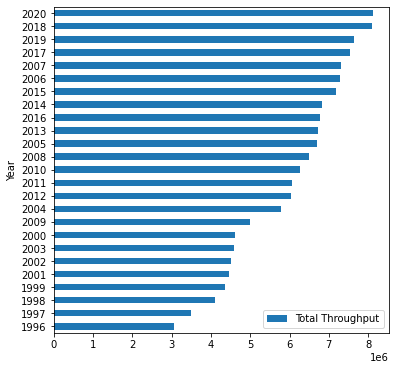

In [10]:
df.sort_values(by='Total Throughput').plot(kind='barh', x='Year', y='Total Throughput', figsize=(6,6))


# df.sort_values(by='empties_inbound_pc').plot(kind='barh', x='Year', y='empties_inbound_pc')

## What year had the largest percent drop in throughput?

You calculate percentage change on a column using using `.pct_change()`.

In [31]:
# df['Total Throughput'].pct_change()#.sort_values(by='Total Throughput').pct_change()
df['pcChange_TT'] = df['Total Throughput'].pct_change()

df.sort_values(by='pcChange_TT').tail()

,Year,Loaded Inbound,Loaded Outbound,Total Loaded,Empties Inbound,Empties Outbound,Total Empties,Total Throughput,total_inbound,empties_inbound_pc,pcChange_TT
2,2018,4097377,1523008,5620386,91364,2379274,2470638,8091023,4188741,1.1292020798853248,0.06014007802902288
5,2015,3625264,1525561,5150825,101560,1939684,2041244,7192069,3726824,1.4121110350860093,0.06153320705853771
13,2007,3704592,1574241,5278834,100309,1933323,2033632,7312465,3804901,1.3717535742051414,0.12710733473329072
12,2008,3189363,1687052,4876415,112911,1498491,1611402,6487816,3302274,1.7403545353320746,0.30012835324094445
0,2020,3998340,1475888,5474227,146370,2492718,2639088,8113315,4144710,1.804071455379213,NaN


## Complete the following sentence, using the year from the last question

`Compared to the previous year, in____ there was a ____% drop in shipping container throughput.` Just type it in a comment, no need to use f-strings or anything. 

In [33]:
#Compared to the previous year, in 2008 there was a 0.3 % drop in shipping container throughput.